use py 3.10.7

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_pl = pd.read_csv("..\\data\\profit_loss_account.csv", thousands=',')

In [3]:
df_pl = df_pl.replace("--", np.nan)
df_pl = df_pl.dropna(how="any")
df_pl = df_pl.transpose()
df_pl = df_pl.rename(columns= lambda x: x)

df_pl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,year,Revenue From Operations [Gross],Revenue From Operations [Net],Total Operating Revenues,Other Income,Total Revenue,Operating And Direct Expenses,Employee Benefit Expenses,Finance Costs,Depreciation And Amortisation Expenses,Other Expenses,Total Expenses,Profit/Loss For The Period,Basic EPS (Rs.),Diluted EPS (Rs.),Equity Share Dividend,Tax On Dividend,Equity Dividend Rate (%)
1,22-Mar,"4,146.80","4,146.80","4,206.22","2,519.31","6,725.53",831.27,238.34,"2,493.66",599.61,"1,329.09","5,491.97",297.56,1.41,1.41,"1,020.88",0,250
2,21-Mar,"4,304.44","4,304.44","4,377.15","2,266.31","6,643.46",919.47,235.01,"2,326.85",619.18,-366.69,"3,733.82","1,927.93",9.49,9.49,0,0,250
3,20-Mar,"4,448.58","4,448.58","4,643.28","2,902.97","7,546.25","1,067.44",224.61,"1,751.88",553.29,"1,917.30","5,514.52","1,934.25",9.43,9.43,691.58,0,160
4,19-Mar,"5,147.58","5,147.58","5,336.38","2,342.90","7,679.28",995.87,230.89,"1,421.84",474.21,770.93,"3,893.74","2,637.72",12.74,12.74,414.19,167.33,10


In [4]:
df_pl.columns = df_pl.iloc[0]
df_pl = df_pl[1:]
# Add a leading zero to single-digit years
df_pl['year'] = df_pl['year'].apply(lambda x: '0' + x if len(x) == 5 else x)

# Convert the 'year' column to datetime format
df_pl['year'] = pd.to_datetime(df_pl['year'], format='%y-%b')
df_pl['year'] = df_pl['year'].dt.strftime('%Y-%m-01')

# removing all commas in values
numeric_columns = df_pl.columns[1:]  # Exclude the first column
df_pl[numeric_columns] = df_pl[numeric_columns].replace(',', '', regex=True).astype(float)
df_pl[df_pl.columns[1:]] = df_pl[df_pl.columns[1:]].astype(float)
df_pl.reset_index()
df_pl.tail()


index,year,Revenue From Operations [Gross],Revenue From Operations [Net],Total Operating Revenues,Other Income,Total Revenue,Operating And Direct Expenses,Employee Benefit Expenses,Finance Costs,Depreciation And Amortisation Expenses,Other Expenses,Total Expenses,Profit/Loss For The Period,Basic EPS (Rs.),Diluted EPS (Rs.),Equity Share Dividend,Tax On Dividend,Equity Dividend Rate (%)
Unnamed: 15,2008-03-01,818.58,818.58,818.58,53.53,872.11,45.08,33.66,133.44,100.64,70.48,517.22,213.41,5.33,5.33,60.10,0.00,15.0
Unnamed: 16,2007-03-01,581.04,581.04,581.04,6.51,587.55,35.24,18.44,66.76,80.70,56.87,415.42,187.44,5.20,5.20,36.04,0.00,10.0
Unnamed: 17,2006-03-01,385.20,385.20,385.20,12.64,397.85,31.71,10.96,54.63,61.42,39.99,283.07,67.24,3.73,3.73,36.04,5.06,20.0
Unnamed: 18,2005-03-01,272.13,272.13,272.13,5.30,277.43,25.62,6.52,35.29,48.10,26.22,186.38,61.85,4.42,4.42,0.00,0.00,0.0
Unnamed: 19,2004-03-01,105.65,105.65,105.65,5.40,111.04,20.97,3.29,43.51,24.19,14.07,109.18,2.74,0.20,0.20,0.00,0.00,0.0


In [5]:
#df_pl.to_csv('..\\data\\profit_loss_processed.csv', index=False)

In [6]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to Unnamed: 19
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    19 non-null     object 
 1   Revenue From Operations [Gross]         19 non-null     float64
 2   Revenue From Operations [Net]           19 non-null     float64
 3   Total Operating Revenues                19 non-null     float64
 4   Other Income                            19 non-null     float64
 5   Total Revenue                           19 non-null     float64
 6   Operating And Direct Expenses           19 non-null     float64
 7   Employee Benefit Expenses               19 non-null     float64
 8   Finance Costs                           19 non-null     float64
 9   Depreciation And Amortisation Expenses  19 non-null     float64
 10  Other Expenses                          19 non-null     floa

In [7]:
df_pl.describe()

index,Revenue From Operations [Gross],Revenue From Operations [Net],Total Operating Revenues,Other Income,Total Revenue,Operating And Direct Expenses,Employee Benefit Expenses,Finance Costs,Depreciation And Amortisation Expenses,Other Expenses,Total Expenses,Profit/Loss For The Period,Basic EPS (Rs.),Diluted EPS (Rs.),Equity Share Dividend,Tax On Dividend,Equity Dividend Rate (%)
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2797.099474,2797.099474,2909.137895,854.513158,3763.651053,581.066316,116.612105,761.514211,324.491579,297.335789,2121.551053,1320.122632,8.514211,8.514211,225.603158,24.692632,66.052632
std,1941.693424,1941.693424,2021.857381,1006.691965,2879.509479,479.220985,88.075427,796.609810,211.980196,521.960019,1770.824963,1071.168448,4.715518,4.715518,264.744682,43.287347,74.843892
min,105.650000,105.650000,105.650000,5.300000,111.040000,20.970000,3.290000,35.290000,24.190000,-366.690000,109.180000,2.740000,0.200000,0.200000,0.000000,0.000000,0.000000
25%,978.085000,978.085000,978.085000,46.890000,1059.705000,65.325000,37.110000,139.460000,118.940000,63.675000,614.375000,255.485000,5.060000,5.060000,36.040000,0.000000,17.500000
50%,3111.140000,3111.140000,3361.050000,203.240000,3564.290000,648.780000,104.380000,441.900000,342.380000,137.660000,1675.100000,1177.260000,9.430000,9.430000,180.330000,0.000000,50.000000
75%,4376.510000,4376.510000,4498.160000,1445.995000,6403.495000,902.505000,202.385000,1310.120000,503.970000,252.420000,3302.205000,2099.655000,11.570000,11.570000,248.465000,35.180000,60.000000
max,6369.640000,6369.640000,6533.820000,2902.970000,8141.140000,1514.520000,238.340000,2493.660000,619.180000,1917.300000,5514.520000,3100.610000,17.490000,17.490000,1020.880000,167.330000,250.000000


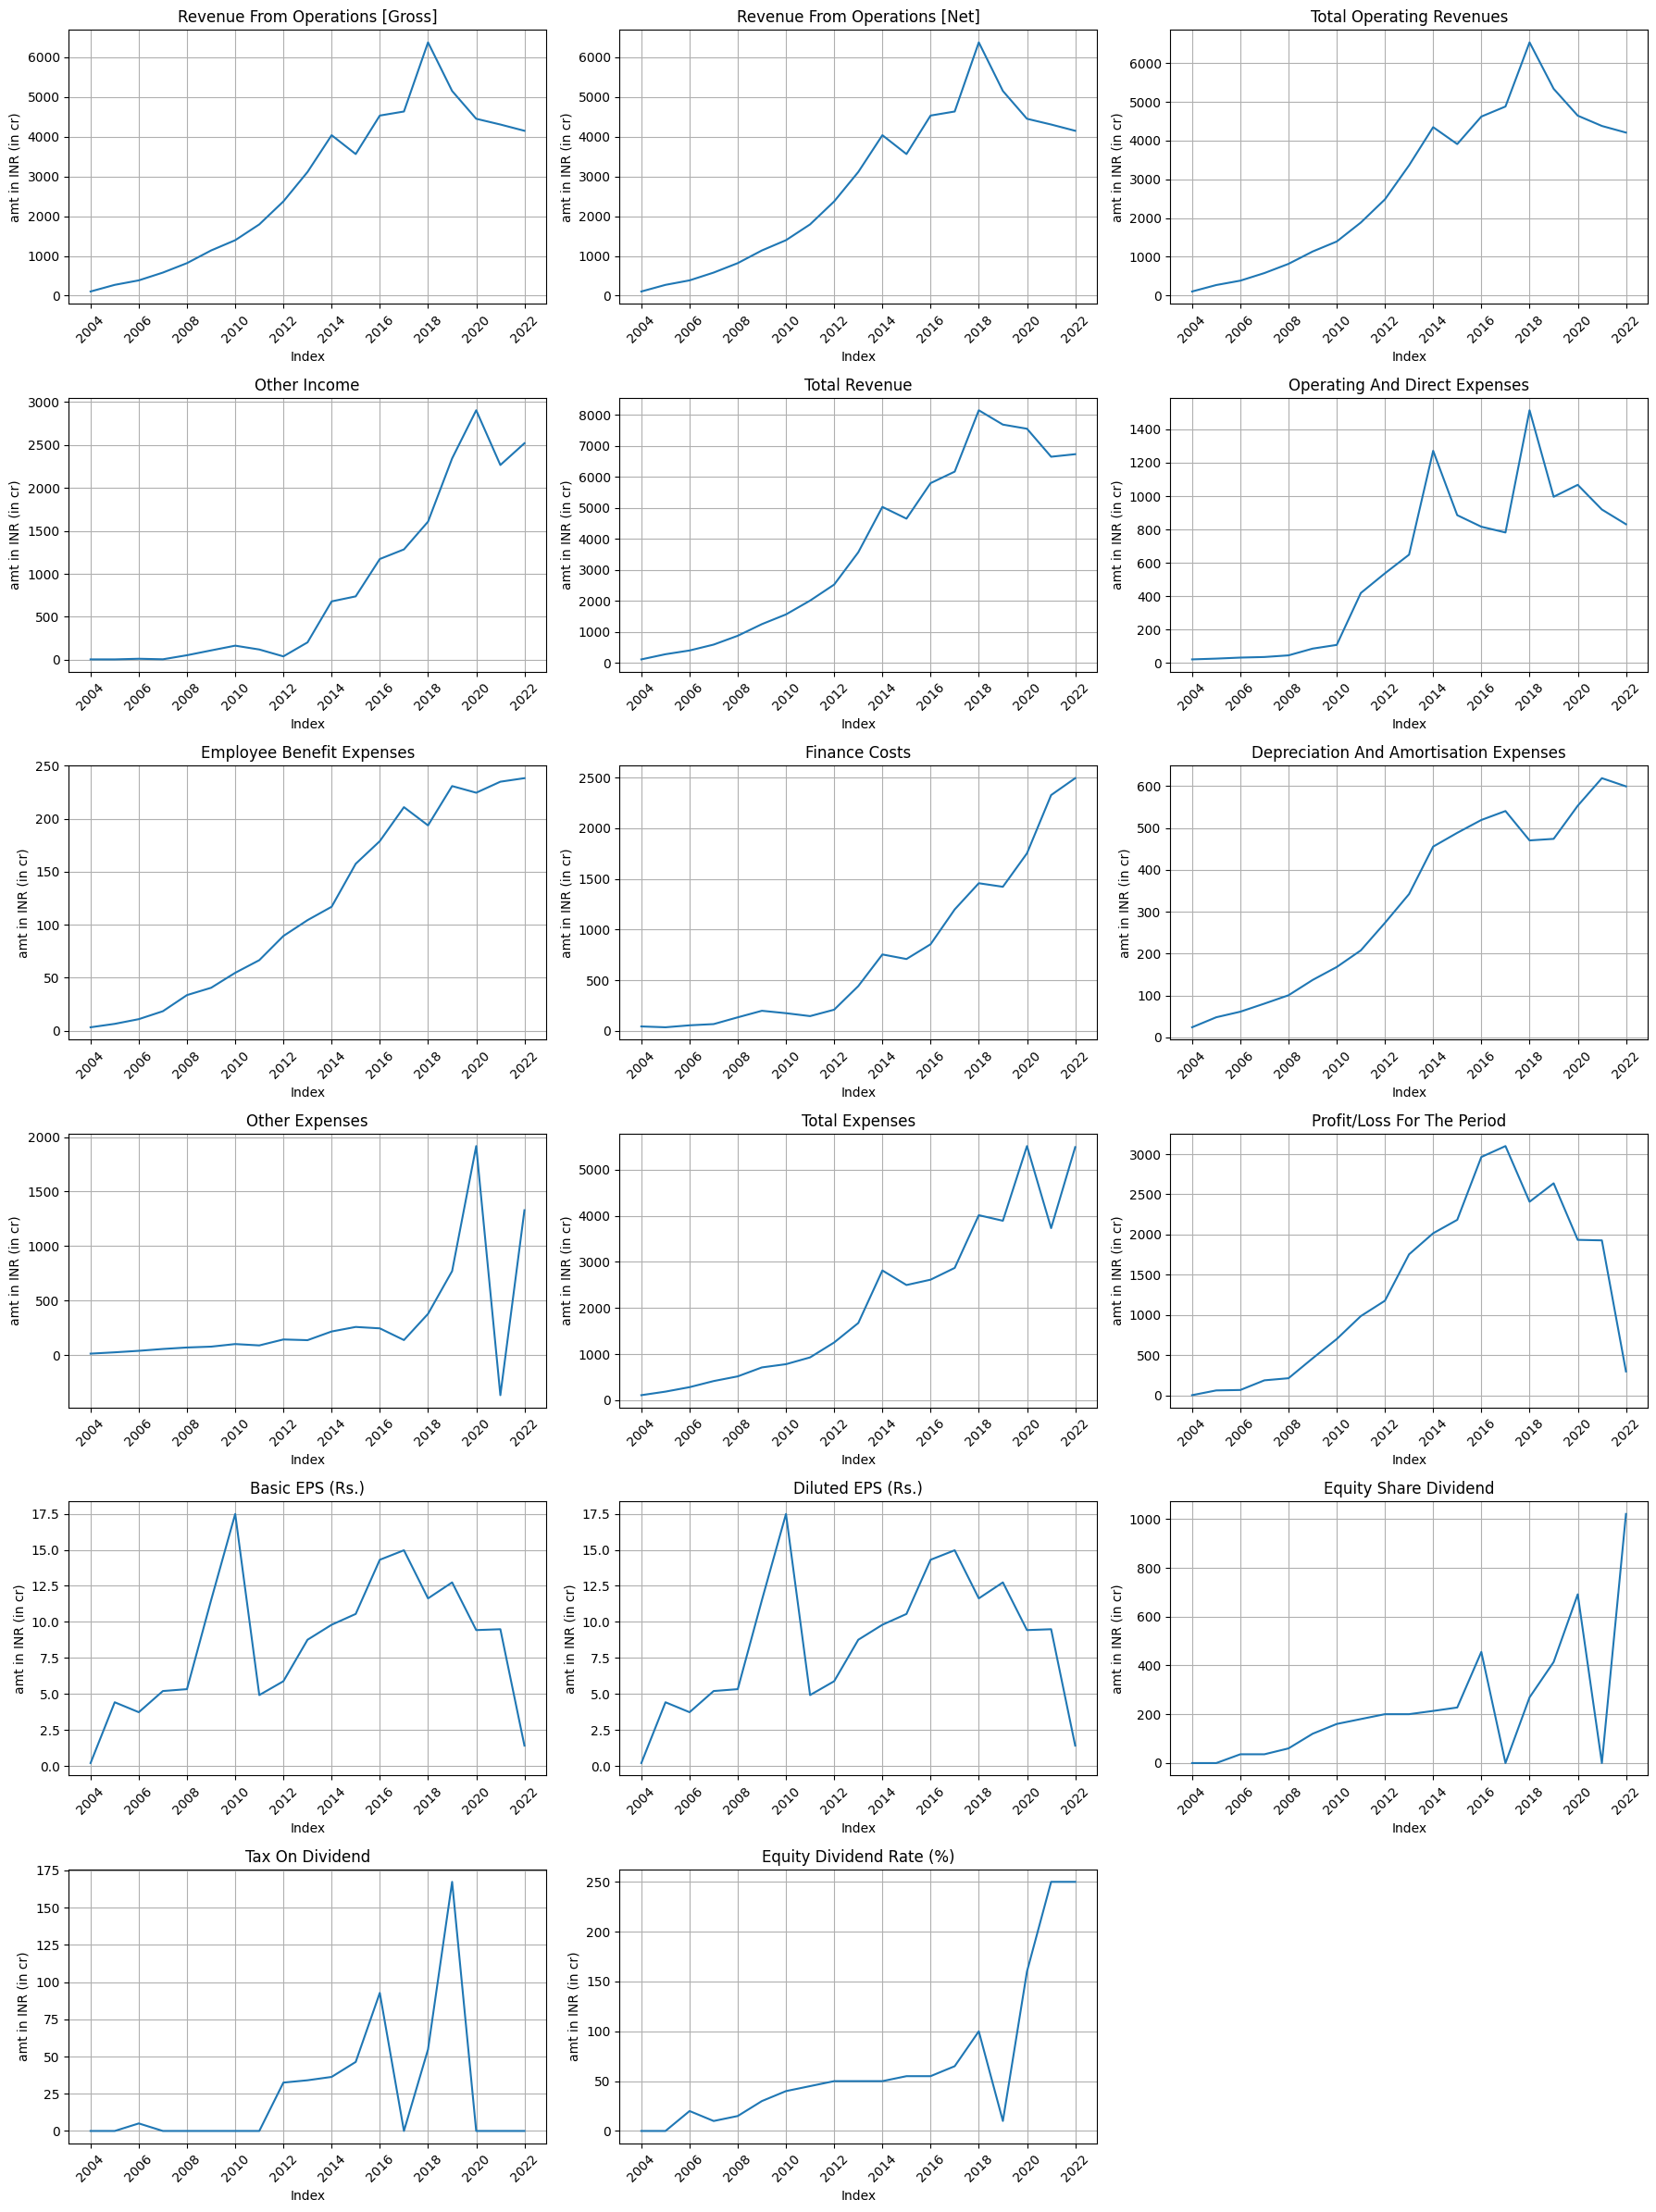

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Exclude the first column
    df = df.iloc[:, 1:]

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Calculate the figure size based on the number of rows and columns
    figsize = (num_cols * 6, num_rows * 4)  # Adjust the multipliers to make the graphs bigger

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define the reversed date range from 2004 to 2022
    start_date = pd.Timestamp('2003-03-01')
    end_date = pd.Timestamp('2022-03-01')
    reversed_index = pd.date_range(start=start_date, end=end_date, freq='A').sort_values(ascending=False)

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns):
        ax = axes[i]  # Select the current axis

        ax.plot(reversed_index, df[col])  # Use the reversed index for x-axis values
        ax.set_title(col)
        ax.set_xlabel('Index')
        ax.set_ylabel('amt in INR (in cr)')
        ax.grid(True)

        # Tilt the x-axis tick labels
        ax.tick_params(axis='x', labelrotation=45)

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()


plot_columns_in_grid(df_pl)


In [9]:
df_1 = df_pl.set_index(['year'])
df_1 = df_1['Operating And Direct Expenses']
df_1 = pd.DataFrame(df_1)
df_1.columns = ['Operating And Direct Expenses']


c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

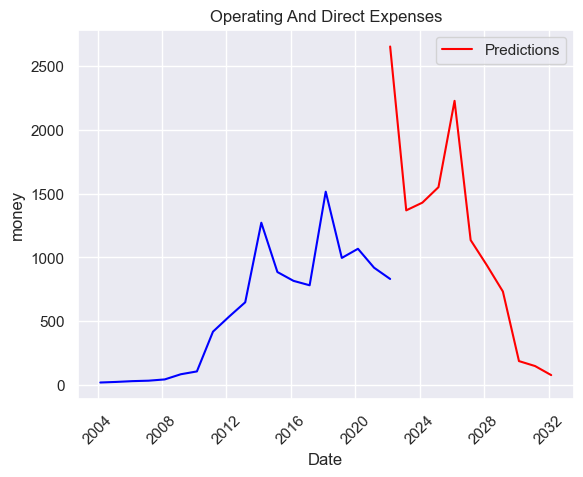

In [10]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt

df_1.index = pd.to_datetime(df_1.index)  # Convert the index to datetime if not already done

y = df_1['Operating And Direct Expenses']
SARIMAXmodel = SARIMAX(y, order=(1, 0, 6), seasonal_order=(5,4,10,15))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

predicted_dates = pd.date_range(start='2022-02-01', periods=11, freq='AS-MAR')

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"]

sns.set()
plt.title("Operating And Direct Expenses")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_1, color="blue")
plt.plot(y_pred_out, color='red', label='Predictions')
plt.legend()
plt.show()


In [11]:
corr_matrix = df_pl.iloc[:, 1:].corr()
corr_matrix = corr_matrix.replace(np.nan,0)
def sparsing(x):
    if x < -0.7:
        return -1
    elif x > 0.7:
        return 1
    else:
        return 0


for index, rows in corr_matrix.iterrows():
    for i in rows:
        corr_matrix.replace(i,sparsing(i),inplace=True)
        
corr_matrix = corr_matrix[~(corr_matrix == 0.0).all(axis=1)]
corr_matrix = corr_matrix.loc[:, (corr_matrix != 0).any(axis=0)]
#corr_matrix

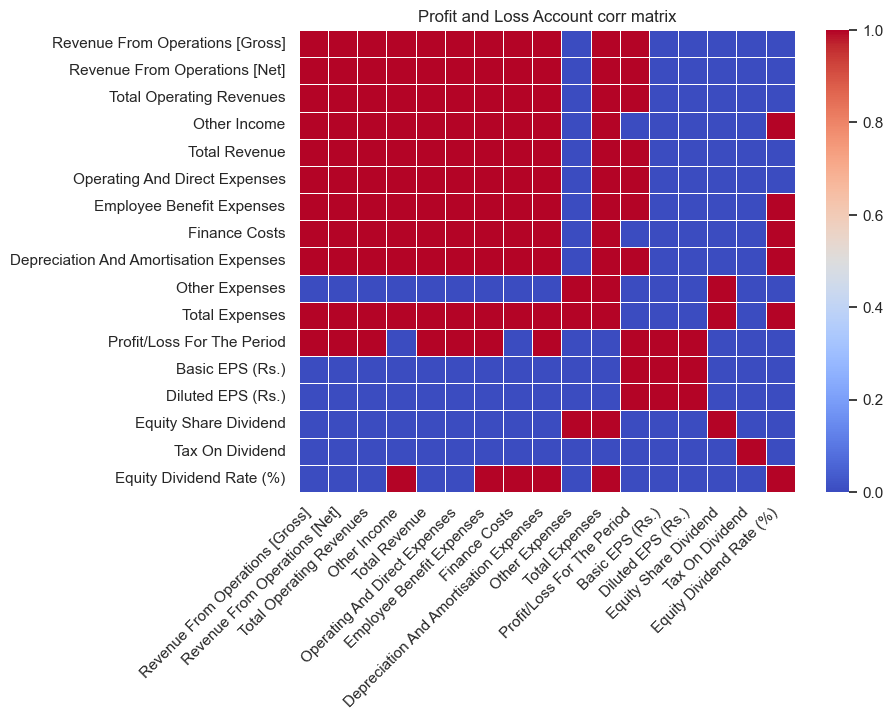

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Generate the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, cbar=True)

# Add gaps between cells
ax.set_xticks(np.arange(0.5, len(corr_matrix.columns), 1))
ax.set_yticks(np.arange(0.5, len(corr_matrix.index), 1))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)

# Add grid lines between the cells
ax.grid(True, color='white')

# Add title and labels
ax.set_title('Profit and Loss Account corr matrix')
ax.set_xlabel(None)
ax.set_ylabel(None)
# Show the plot
plt.show()

In [13]:
#corr_matrix.to_csv("..\data\profit_loss_corr.csv")

In [14]:
df_pl.head(1)

index,year,Revenue From Operations [Gross],Revenue From Operations [Net],Total Operating Revenues,Other Income,Total Revenue,Operating And Direct Expenses,Employee Benefit Expenses,Finance Costs,Depreciation And Amortisation Expenses,Other Expenses,Total Expenses,Profit/Loss For The Period,Basic EPS (Rs.),Diluted EPS (Rs.),Equity Share Dividend,Tax On Dividend,Equity Dividend Rate (%)
1,2022-03-01,4146.8,4146.8,4206.22,2519.31,6725.53,831.27,238.34,2493.66,599.61,1329.09,5491.97,297.56,1.41,1.41,1020.88,0.0,250.0


In [15]:
#keeping columns that matter
drop_clms = ['Revenue From Operations [Gross]', 'Revenue From Operations [Net]', 'Other Expenses', 'Tax On Dividend', 'Diluted EPS (Rs.)']
df_pl = df_pl.drop(columns=drop_clms)

In [16]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = df_pl.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}

def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    y = df[column_name]
    SARIMAXmodel = SARIMAX(y, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    y_pred = SARIMAXmodel.get_forecast(11)
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    predicted_dates = pd.date_range(start='2022-02-01', periods=11, freq='AS-MAR')

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out

for column_name in df_1.columns:
    sarimax_preds(df_1[column_name], column_name)

predictions_dict

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

{'Total Operating Revenues': 2022-03-01    11434.188675
 2023-03-01     8538.007744
 2024-03-01     8083.550098
 2025-03-01     6841.382199
 2026-03-01     7605.117445
 2027-03-01     5881.839391
 2028-03-01     4343.326396
 2029-03-01     3298.873560
 2030-03-01     2441.933285
 2031-03-01     1990.783140
 2032-03-01     1432.515460
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Other Income': 2022-03-01    2812.810904
 2023-03-01    2248.173223
 2024-03-01    2052.348160
 2025-03-01    1291.780415
 2026-03-01    1189.562882
 2027-03-01     355.670114
 2028-03-01      70.437523
 2029-03-01     210.402568
 2030-03-01     288.365093
 2031-03-01     191.992562
 2032-03-01      93.677530
 Freq: AS-MAR, Name: Predictions, dtype: float64,
 'Total Revenue': 2022-03-01    14246.999579
 2023-03-01    10786.180967
 2024-03-01    10135.898258
 2025-03-01     8133.162614
 2026-03-01     8794.680327
 2027-03-01     6237.509505
 2028-03-01     4413.763919
 2029-03-01     3509.276128
 2030-03-0

In [17]:
predictions_df = pd.DataFrame(predictions_dict)
predictions_df['year'] = pd.to_datetime(predictions_df.index).date
df_cf = pd.concat([df_pl, predictions_df], ignore_index=True)
df_cf['year'] = pd.to_datetime(df_cf['year']).dt.date
df_cf = df_cf.sort_values('year', ascending=False)
df_cf = df_cf.reset_index(drop=True)
df_cf.head()

,year,Total Operating Revenues,Other Income,Total Revenue,Operating And Direct Expenses,Employee Benefit Expenses,Finance Costs,Depreciation And Amortisation Expenses,Total Expenses,Profit/Loss For The Period,Basic EPS (Rs.),Equity Share Dividend,Equity Dividend Rate (%)
0,2032-03-01,1432.515460,93.677530,1526.192991,78.890025,58.905019,233.520075,176.120057,905.135291,373.467620,9.327503,105.175034,26.250008
1,2031-03-01,1990.783140,191.992562,2182.775702,149.747548,70.980023,346.605111,240.170077,1245.177900,806.907759,20.142506,210.385068,52.500017
2,2030-03-01,2441.933285,288.365093,2730.298378,188.527561,95.690031,305.095098,294.245095,1368.010440,1226.715394,30.607510,280.507590,70.000022
3,2029-03-01,3298.873560,210.402568,3509.276128,733.197736,116.585037,254.590082,363.755117,1624.735522,1725.780555,8.610003,315.577601,78.750025
4,2028-03-01,4343.326396,70.437523,4413.763919,939.417802,156.485050,365.312617,478.625154,2191.980705,2060.205662,10.290003,350.595113,87.500028


In [18]:
#df_cf.to_csv("..\data\profit_loss_predicted.csv")

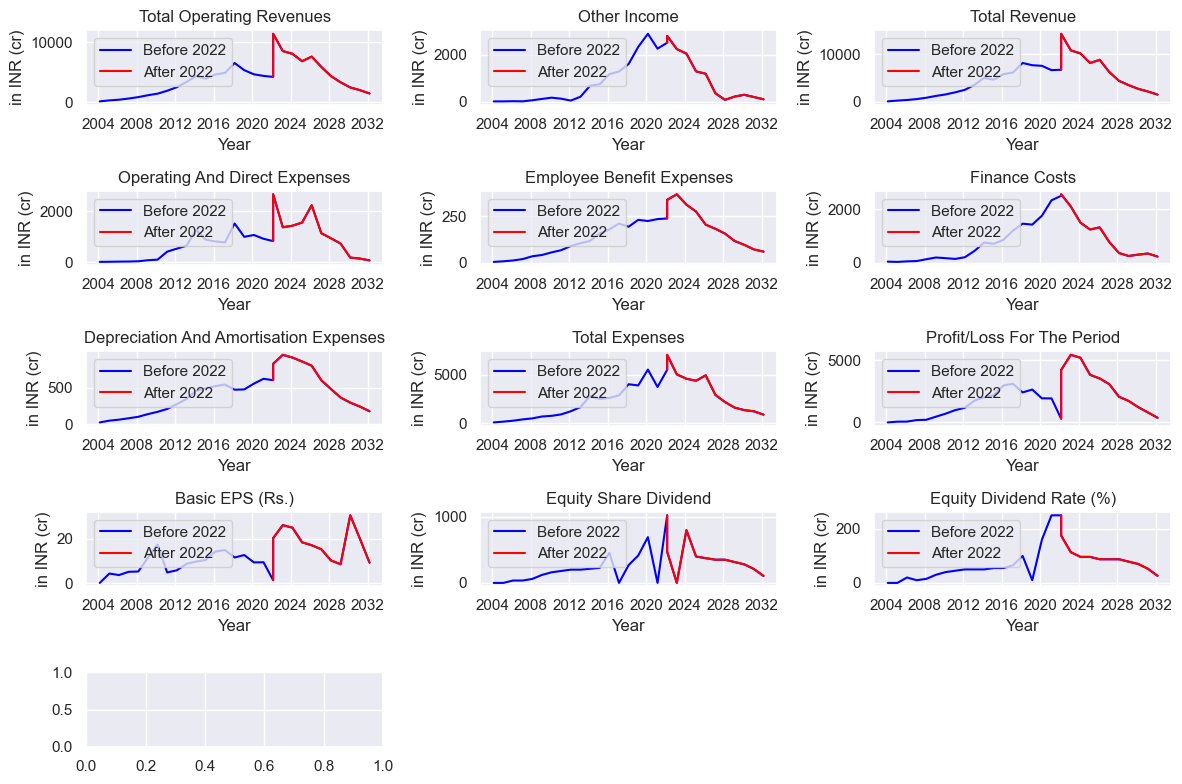

In [19]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(df):
    # Convert the date column to datetime format
    df['year'] = pd.to_datetime(df['year']).dt.date

    # Determine the number of columns and rows in the grid
    num_cols = 3  # Number of columns in the grid
    num_rows = (len(df.columns) - 1) // num_cols + 1  # Number of rows in the grid

    # Create a figure and axes for the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each column in a separate graph
    for i, col in enumerate(df.columns[1:]):
        ax = axes[i]  # Select the current axis

        # Plot data points in blue before 2022
        ax.plot(df['year'], df[col], color='blue', label='Before 2022')

        # Plot data points in red after 2022
        ax.plot(df[df['year'] >= pd.to_datetime('2022').date()]['year'], df[df['year'] >= pd.to_datetime('2022').date()][col], color='red', label='After 2022')

        ax.set_title(col)
        ax.set_xlabel('Year')
        ax.set_ylabel('in INR (cr)')
        ax.grid(True)
        ax.legend()

    # Remove any unused axes
    if len(df.columns) < len(axes):
        for j in range(len(df.columns), len(axes)):
            fig.delaxes(axes[j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the grid of graphs
    plt.show()


plot_columns_in_grid(df_cf)

MLP Regressor

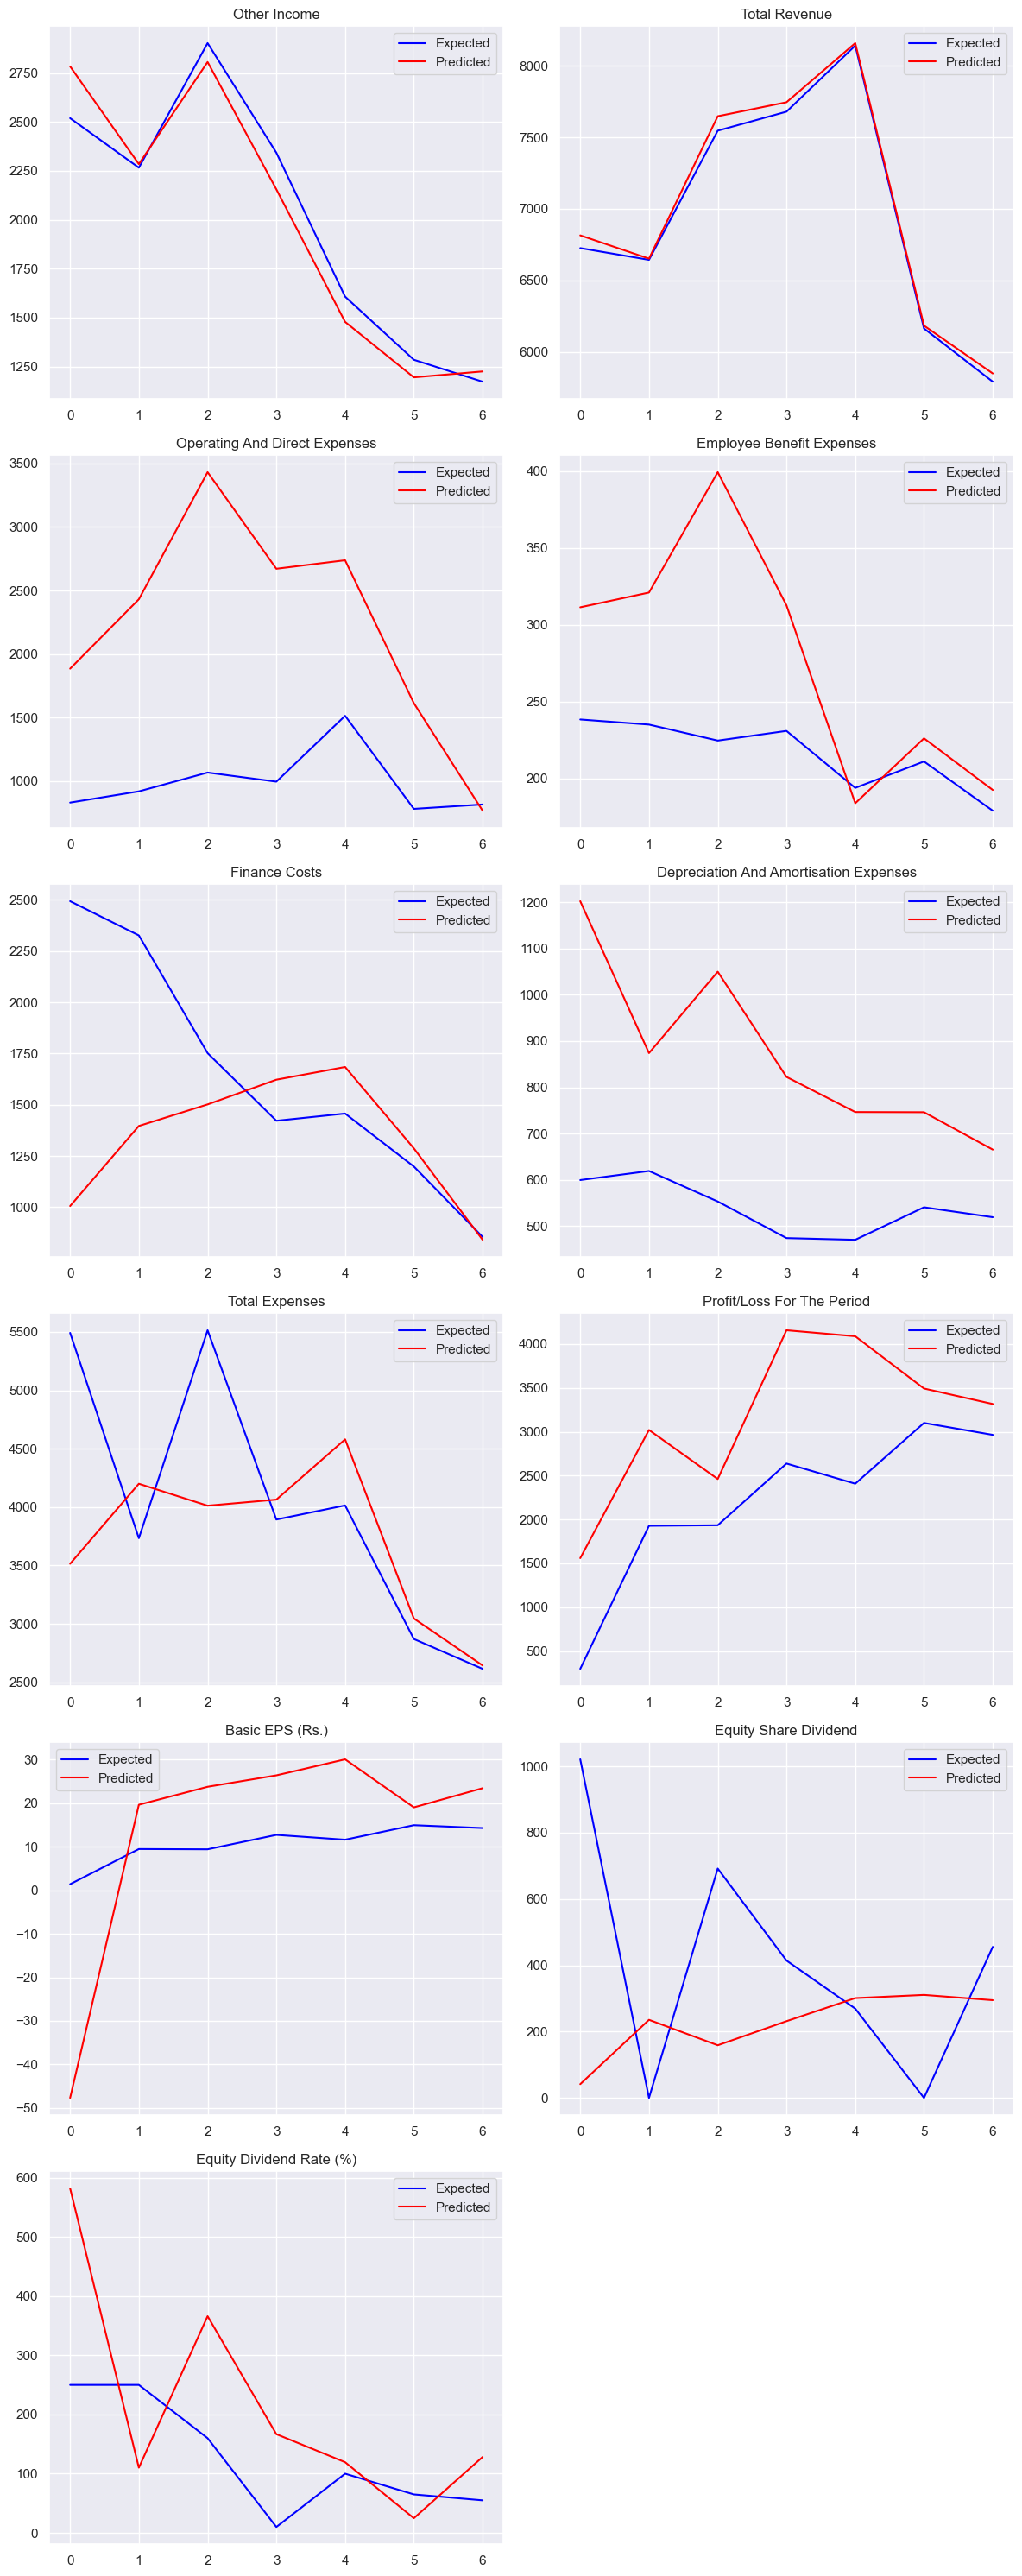

RMSE for Other Income: 142.5247
RMSE for Total Revenue: 61.654
RMSE for Operating And Direct Expenses: 1413.5137
RMSE for Employee Benefit Expenses: 84.899
RMSE for Finance Costs: 680.677
RMSE for Depreciation And Amortisation Expenses: 365.6032
RMSE for Total Expenses: 983.0288
RMSE for Profit/Loss For The Period: 1100.0315
RMSE for Basic EPS (Rs.): 21.8738
RMSE for Equity Share Dividend: 455.9781
RMSE for Equity Dividend Rate (%): 170.7943


In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = df_pl.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}  # New dictionary to store RMSE values

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.4)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(20,40,30), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse,4)}")